# Exercises 
### Loes Gennissen - S1102321

## Exercise 1: explore filter parameters
---
In this exercises you will explore how different parameters affect the filtering process.
- Import the data form `data/moving_lfp.pickle` (the file is already on your machine if you run the `download_data()` cell in the main lesson)
- Take a few seconds of the data, and filter them in different frequency bands. Plot the resulting singal.
  Fix the central frequency and play with the width of the band, then try to change the central frequency of the band.
- Change the order of the filter, keeping the frequency band fixed. How does the filtered signal change? How does the computing time change? (You can try to quantify the computing time with the jupyter magic command [`%timeit`](https://docs.python.org/3/library/timeit.html) )
- Comment on what you see

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import numpy as np
import sys
import os
sys.path.append(os.path.abspath("code"))
from utils import download_data
import lfp_functions as lf
from scipy.signal import butter
from scipy.signal import sosfilt

sns.set_theme(context='notebook',style='white',font_scale=1.5,
              rc = {'axes.spines.top':False,'axes.spines.right':False,
                     'image.cmap':plt.cm.jet})

In [33]:
# Import the data
with open('data/moving_lfp.pickle', 'rb') as handle:
    lfp_data = pickle.load(handle)

lfp = lfp_data['lfp']
sampling_rate = lfp_data['sampling_rate']
print(f'Loaded {len(lfp)/sampling_rate} seconds of LFP, sampled at {sampling_rate} Hz')

Loaded 600.133 seconds of LFP, sampled at 1000.0 Hz


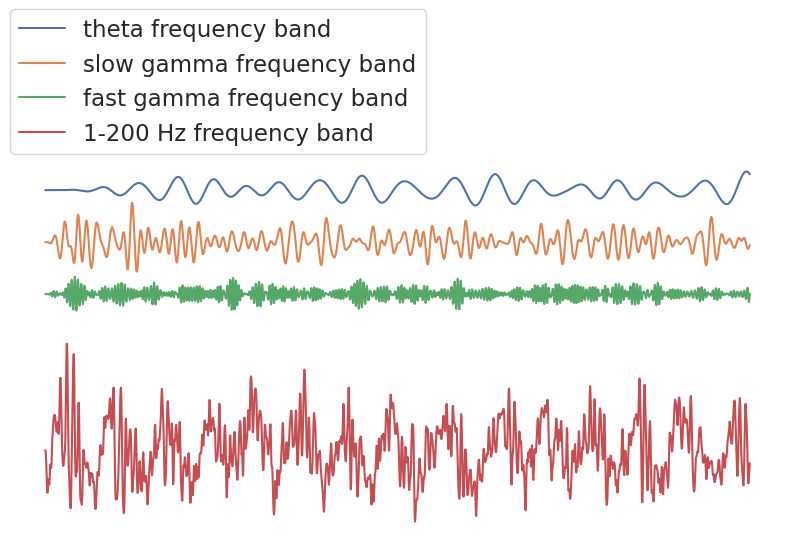

In [34]:
# Filter the data in different frequency bands
plot_offset = 200 #to plot the signal on different lines

# Theta frequency band 
theta_lfp = lf.bandpass_filter(lfp,low_f=8,high_f=12, sampling_rate=sampling_rate)

# Slow gamma frequency band 
slow_gamma_lfp = lf.bandpass_filter(lfp,low_f=20,high_f=45, sampling_rate=sampling_rate)

# Fast gamma frequency band
fast_gamma_lfp = lf.bandpass_filter(lfp,low_f=100,high_f=140, sampling_rate=sampling_rate)

# Frequency band in range 1 - 200 Hz
hz_lfp = lf.bandpass_filter(lfp,low_f=1,high_f=200, sampling_rate=sampling_rate)

plt.figure(figsize=(10,5))
plt.plot(theta_lfp[:2000]+3*plot_offset,label='theta frequency band')
plt.plot(slow_gamma_lfp[:2000]+2*plot_offset,label='slow gamma frequency band')
plt.plot(fast_gamma_lfp[:2000]+plot_offset,label='fast gamma frequency band')
plt.plot(hz_lfp[:2000]-2*plot_offset, label='1-200 Hz frequency band')

plt.axis('off')
plt.legend(loc=(0,1))

In [35]:
# Change the order of the filter, keeping the frequency band fixed

# Original order of 5 
%timeit lf.bandpass_filter(lfp, low_f=8, high_f=12, sampling_rate=sampling_rate, filter_order=5)
order5_lfp = lf.bandpass_filter(lfp, low_f=8, high_f=12, sampling_rate=sampling_rate, filter_order=5)

# Higher order of 10
%timeit lf.bandpass_filter(lfp, low_f=8, high_f=12, sampling_rate=sampling_rate, filter_order=10)
order10_lfp = lf.bandpass_filter(lfp, low_f=8, high_f=12, sampling_rate=sampling_rate, filter_order=10)

# Lower order of 2
%timeit lf.bandpass_filter(lfp, low_f=8, high_f=12, sampling_rate=sampling_rate, filter_order=2)
order2_lfp = lf.bandpass_filter(lfp, low_f=8, high_f=12, sampling_rate=sampling_rate, filter_order=2)

3.95 ms ± 36.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
7.13 ms ± 252 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
2.9 ms ± 113 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


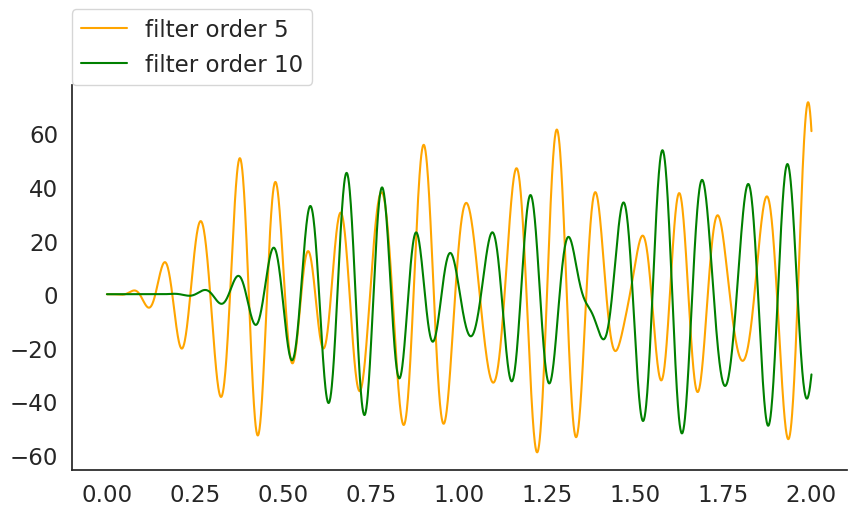

In [36]:
plt.figure(figsize=(10,5))
plt.plot(np.linspace(0,2,2000), order5_lfp[:2000], label = 'filter order 5', color='orange')
plt.plot(np.linspace(0,2,2000), order10_lfp[:2000],label = 'filter order 10', color='green')
plt.legend(loc=(0,1))

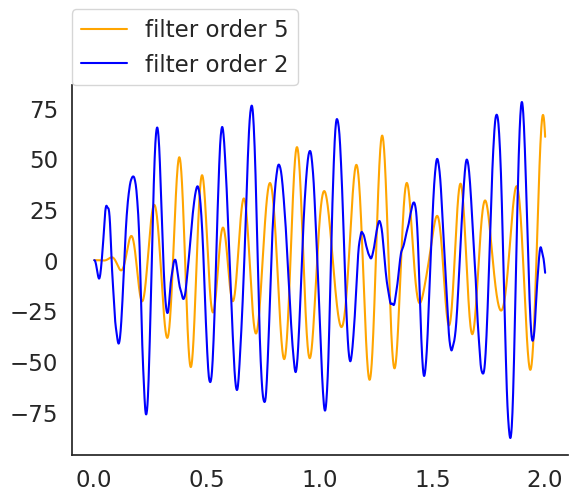

In [37]:
plt.plot(np.linspace(0,2,2000), order5_lfp[:2000], label = 'filter order 5', color='orange')
plt.plot(np.linspace(0,2,2000), order2_lfp[:2000],label = 'filter order 2', color='blue')
plt.legend(loc=(0,1))

### Comments Exercise 1:
As the order of the filter gets higher, the computation time also increases. For example, when the order is increased from 5 to 10, the computation time also almost doubles. The order 2 filter shows a higher range in peaks in comparison to the original order 5, whereas order 5 filter shows some higher peaks compared to order 10 filter.

## Exercise 2: wavelet transform with real wavelets
---
In this exercises you will explore the difference between real and complex wavelets in the continous wavelet transform.
- Import the data form `data/moving_lfp.pickle`
- Select a period of a few seconds of the signal and compute the spectrogram. 
  Try the wavelet transform with wavelet `mexh` (mexican hat),`gaus` (gaussian) and `morl` (morlet). These are all real wavelets.
- What differences do you see with respect to the spectrum computed with the complex Morlet tranform ? Comment on why do you think this might be the case.

In [38]:
# Import the data
with open('data/moving_lfp.pickle', 'rb') as handle:
    lfp_data = pickle.load(handle)

lfp = lfp_data['lfp']
sampling_rate = lfp_data['sampling_rate']
print(f'Loaded {len(lfp)/sampling_rate} seconds of LFP, sampled at {sampling_rate} Hz')

Loaded 600.133 seconds of LFP, sampled at 1000.0 Hz


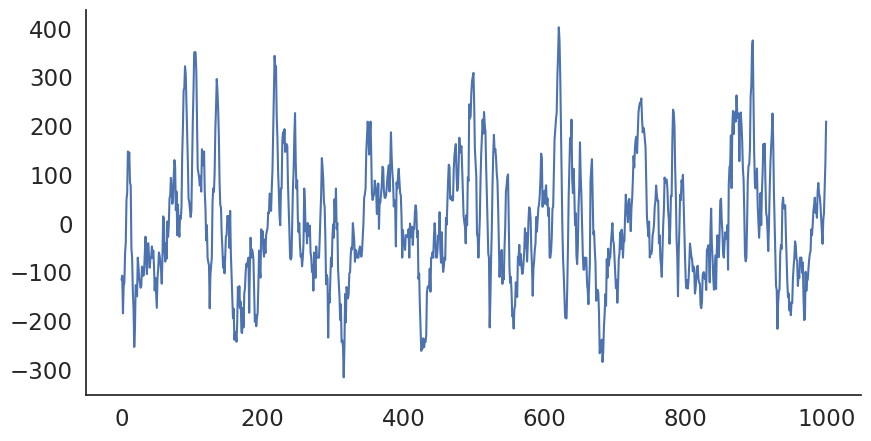

In [39]:
from pywt import wavelist
from pywt import scale2frequency
from pywt import cwt

# Select a period of a few seconds of the signal
start = 5 #in seconds
end = 6 # in seconds

sig = lfp[int(start*sampling_rate):int(end*sampling_rate)]
sig = sig - np.mean(sig) # get rid of 0 frequency component

plt.figure(figsize=(10,5))
plt.plot(sig)

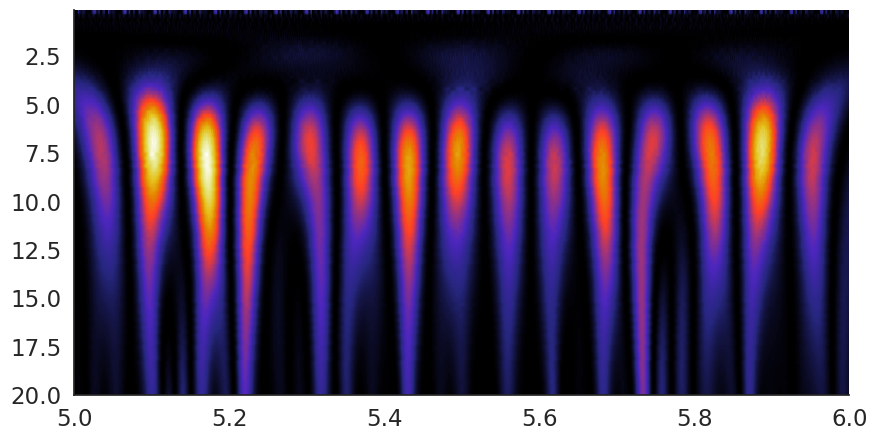

In [40]:
#spectrogram with mexican hat wavelets transform

frequencies =  np.linspace(0.1,20,100)/sampling_rate
wavelet = 'mexh'
scales = scale2frequency(wavelet, frequencies)
cwtmatr, _ = cwt(sig, wavelet=wavelet, scales=scales,
                  sampling_period=1.0/sampling_rate)
plt.figure(figsize=(10,5))
plt.imshow(abs(cwtmatr)**2, extent=[start,end,frequencies[-1]*sampling_rate,
                         frequencies[0]*sampling_rate], aspect='auto', cmap='CMRmap')

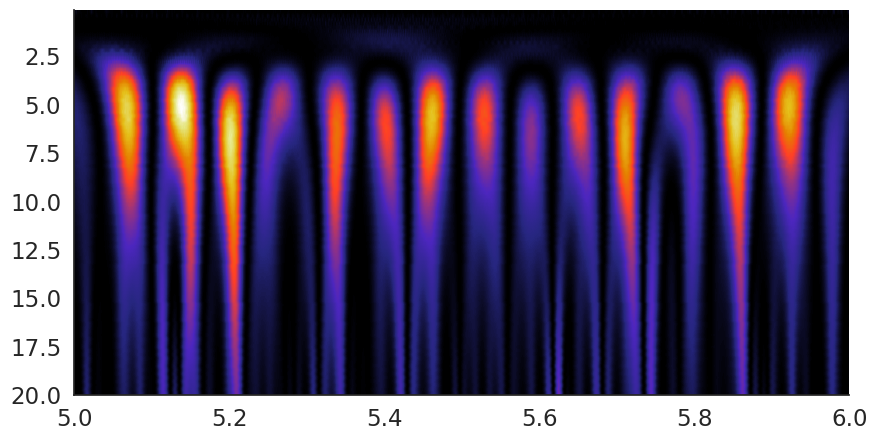

In [41]:
#spectrogram with gaussian wavelets transform

frequencies =  np.linspace(0.1,20,100)/sampling_rate
wavelet = 'gaus1'
scales = scale2frequency(wavelet, frequencies)
cwtmatr, _ = cwt(sig, wavelet=wavelet, scales=scales,
                  sampling_period=1.0/sampling_rate)
plt.figure(figsize=(10,5))
plt.imshow(abs(cwtmatr)**2, extent=[start,end,frequencies[-1]*sampling_rate,
                         frequencies[0]*sampling_rate], aspect='auto', cmap='CMRmap')

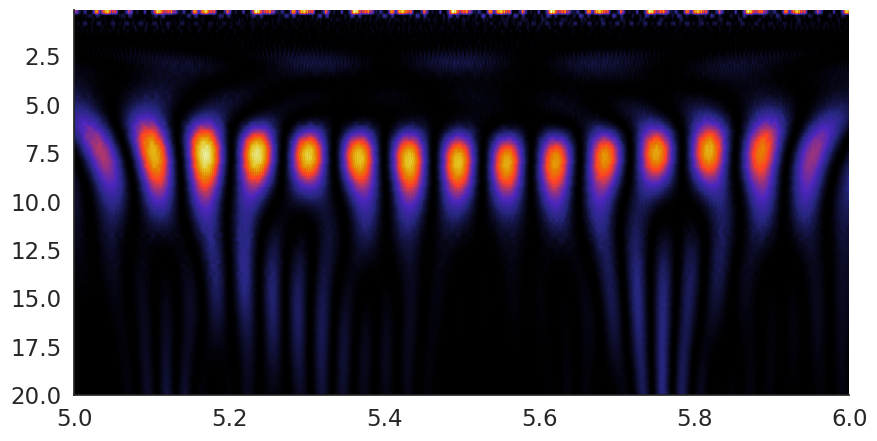

In [42]:
#spectrogram with morlet wavelets transform

frequencies =  np.linspace(0.1,20,100)/sampling_rate
wavelet = 'morl'
scales = scale2frequency(wavelet, frequencies)
cwtmatr, _ = cwt(sig, wavelet=wavelet, scales=scales,
                  sampling_period=1.0/sampling_rate)
plt.figure(figsize=(10,5))
plt.imshow(abs(cwtmatr)**2, extent=[start,end,frequencies[-1]*sampling_rate,
                         frequencies[0]*sampling_rate], aspect='auto', cmap='CMRmap')

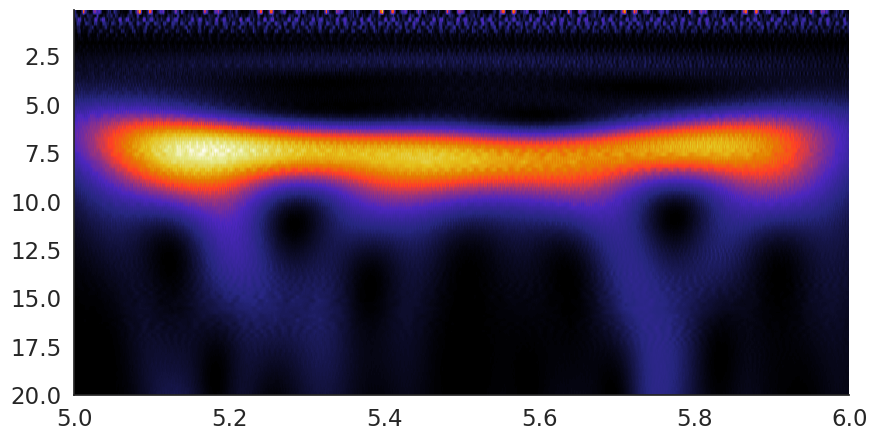

In [44]:
#spectrogram with complex morlet wavelets transform

frequencies =  np.linspace(0.1,20,100)/sampling_rate
wavelet = 'cmor1.0-1.0'
scales = scale2frequency(wavelet, frequencies)
cwtmatr, _ = cwt(sig, wavelet=wavelet, scales=scales,
                  sampling_period=1.0/sampling_rate)
plt.figure(figsize=(10,5))
plt.imshow(abs(cwtmatr)**2, extent=[start,end,frequencies[-1]*sampling_rate,
                         frequencies[0]*sampling_rate], aspect='auto', cmap='CMRmap')

### Comments Exercise 2:
The difference between the morl (morlet) and the cmor (complex morlet) wavelet transforms can be seen in the aspect of discrete points in the morl spectogram and a continuous blob for the cmor spectogram along the x-axis (time). This can be due to the fact that the morl wavelet is a localized pattern, which means it only gives information about a given frequency at a given time, without including the phase. Because the complex morlet wavelet can also capture the phase information, the spectogram shows continuous values instead of discrete points.

## Exercise 3: REM sleep detection
---
Mammalian sleep is organized in different phases. [Rapid Eye Movement (REM) sleep](https://en.wikipedia.org/wiki/Rapid_eye_movement_sleep) is a well studied phase, with clear markers that make it detectable from LFP data. One of the most used marker is the ratio (or difference) between the oscillatory power in the theta and delta bands in the hippocampus. During REM sleep, the former dominates, in a pattern that resembles active behaviour.  
In this exercise we will use the tools we learned about to detect and inspect the REM and non-REM (nREM) phases of sleep in data recorded from the hippocampus of a sleeping mouse.

- Import the data form `data/moving_lfp.pickle`
- Compute the instantaneous power in the theta (6-10 Hz) and delta (2-4 Hz) frequency bands, for the whole signal.
- z-score the two power signals (subtract the mean and divide by the standard deviation, you can use `scipy.stats.zscore()`)
- Compute and plot the power difference (`theta_power - delta_power`) for the sleep session.
- Compute the REM (power difference $>0.2$) and nREM (power diffewrence $<0.2$) sleep periods.
- Plot examples of REM vs nREM lfp signals (wideband filtered betw. 1 and 200 Hz to get rid of some of the noise).
- Explore how changing the threshold affects the amount of REM sleep detected.

In [45]:
# Import the data
with open('data/moving_lfp.pickle', 'rb') as handle:
    lfp_data = pickle.load(handle)

lfp = lfp_data['lfp']
sampling_rate = lfp_data['sampling_rate']
print(f'Loaded {len(lfp)/sampling_rate} seconds of LFP, sampled at {sampling_rate} Hz')

Loaded 600.133 seconds of LFP, sampled at 1000.0 Hz


In [46]:
def compute_power(signal, sampling_rate, low_f, high_f):
    '''Takes lfp signal and sampling rate, returns instantaneous power in the specified band'''
    signal = signal - np.mean(signal) # get rid of 0 frequency component

    frequencies =  np.linspace(low_f,high_f,50)/sampling_rate
    wavelet = 'cmor1.0-1.0'
    scales = scale2frequency(wavelet, frequencies)
    cwtmatr, _ = cwt(signal, wavelet=wavelet, scales=scales,
                    sampling_period=1.0/sampling_rate)

    power = np.mean(abs(cwtmatr)**2,axis=0)

    return power

In [47]:
# Compute the instantaneous power in the theta (6-10 Hz) and delta (2-4 Hz) frequency bands
theta_power = compute_power(lfp, sampling_rate, 6, 10)
delta_power = compute_power(lfp, sampling_rate, 2, 4)

In [48]:
# z-score the two power signals
from scipy.stats import zscore

theta_power_z = zscore(theta_power)
delta_power_z = zscore(delta_power)

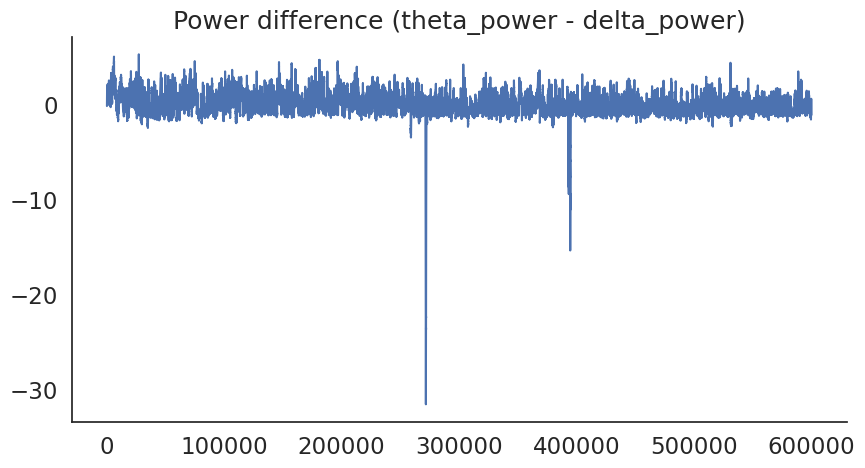

In [49]:
# Compute the power difference for the sleep session
power_difference = theta_power_z - delta_power_z

# Plot the power difference
plt.figure(figsize=(10, 5))
plt.plot(power_difference)
plt.title('Power difference (theta_power - delta_power)')
plt.show()

In [99]:
# Compute the REM and nREM sleep periods
REM_sleep = power_difference > 0.2
nREM_sleep = power_difference < 0.2

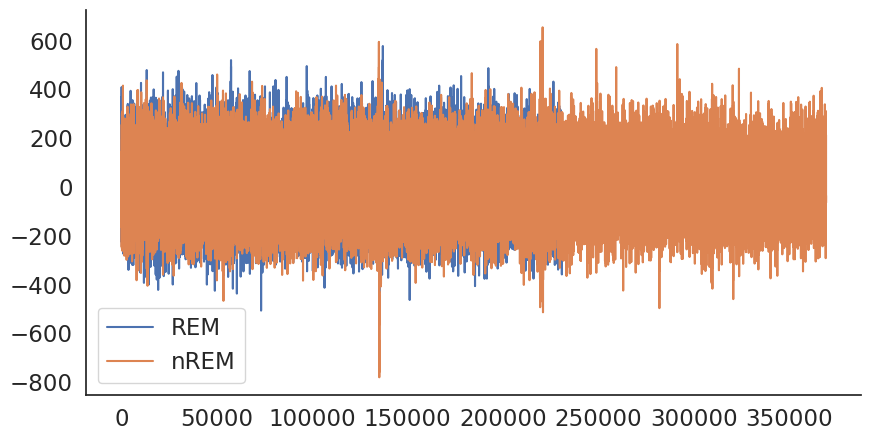

In [100]:
# Wideband filtered betw. 1 and 200 Hz to get rid of some of the noise
filtered_lfp = lf.bandpass_filter(lfp,low_f=1,high_f=200, sampling_rate=sampling_rate)

#Plot examples of REM vs nREM lfp signals
plt.figure(figsize=(10, 5))
plt.plot(filtered_lfp[REM_sleep], label='REM')
plt.plot(filtered_lfp[nREM_sleep], label='nREM')
plt.legend()
plt.show()

### Comments Exercise 3:
When the threshold is set lower than 0.2, the REM sleep becomes longer in time. When the threshold is set higher the REM sleep is less time compared to the time at 0.2 threshold. 